# 2019-12-12
## Lecture：Tree-Based Methods

In [1]:
#install.packages('tree')

## <font color='blue'> Decision tree</font>

### We first use classification trees to analyze the<font color='red'> Carseats</font>  data set.
### <font color='red'> Sales</font> is a continuous variable, and so we begin by recoding it as a binary variable.

In [2]:
library(ISLR)
library(tree)
data(Carseats)

In [3]:
High = ifelse(Carseats$Sales <= 8, "No" ,"Yes")
Carseats = data.frame(Carseats ,High)

In [4]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


### We now use the <font color='red'> tree()</font> function to fit a classification tree in order to predict tree() <font color='red'> high</font> using all variables but Sales.

In [5]:
tree.carseats = tree(High~.-Sales, data=Carseats)

In [6]:
summary(tree.carseats )


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

### The <font color='red'> summary()</font> function lists the variables that are used as internal nodes in the tree, the number of terminal nodes, and the (training) error rate.

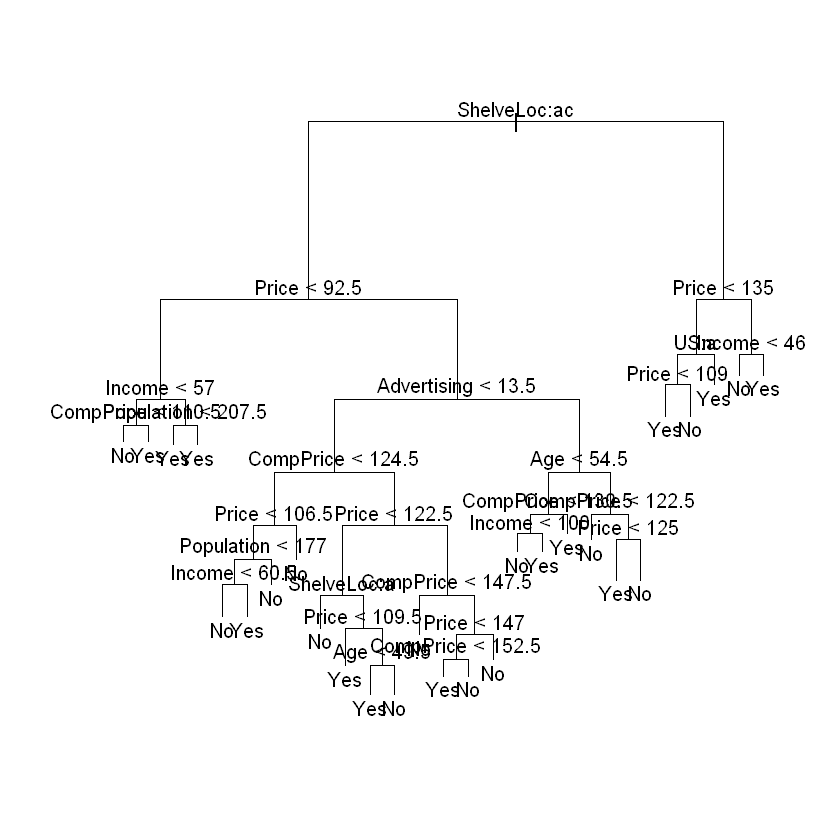

In [7]:
plot(tree.carseats)
text(tree.carseats)

### In order to properly evaluate the performance of a classification tree on these data, we must estimate the test error rather than simply computing the training error. 

In [8]:
set.seed(2)
train = sample (1:nrow(Carseats), 200) #50%訓練集 50%測試集
Carseats.test = Carseats[-train, ]
High.test = High[-train] #response

In [9]:
tree.carseats = tree(High~.-Sales , data = Carseats, subset = train)
tree.pred = predict(tree.carseats ,Carseats.test ,type="class") #指定type="class"表示會回傳預測的種類
table(tree.pred, High.test)#混淆矩陣
mean(tree.pred==High.test)#測試集準確度

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

[1] 0.77

## <font color='blue'> Bagging and Random Forests</font>

### Here we apply bagging and random forests. Using the <font color='red'> randomForest</font> package in R.

In [10]:
#install.packages('randomForest')

In [11]:
library(randomForest)
library(MASS)
set.seed(1)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [12]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,No
4.15,141,64,3,340,128,Bad,38,13,Yes,No,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes,Yes


### The argument <font color='red'> mtry=10</font> indicates that all 10 predictors should be considered for each split of the tree—in other words, that bagging should be done.

### By default, randomForest() uses $\sqrt{p}$ variables when building a random forest of classification trees.

In [13]:
bag.Carseats = randomForest(High~.-Sales, data = Carseats, mtry=10, ntree=500)
bag.Carseats


Call:
 randomForest(formula = High ~ . - Sales, data = Carseats, mtry = 10,      ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 19%
Confusion matrix:
     No Yes class.error
No  207  29   0.1228814
Yes  47 117   0.2865854

### Using the <font color='red'> varImpPlot()</font> function, we can view the importance of each variable.

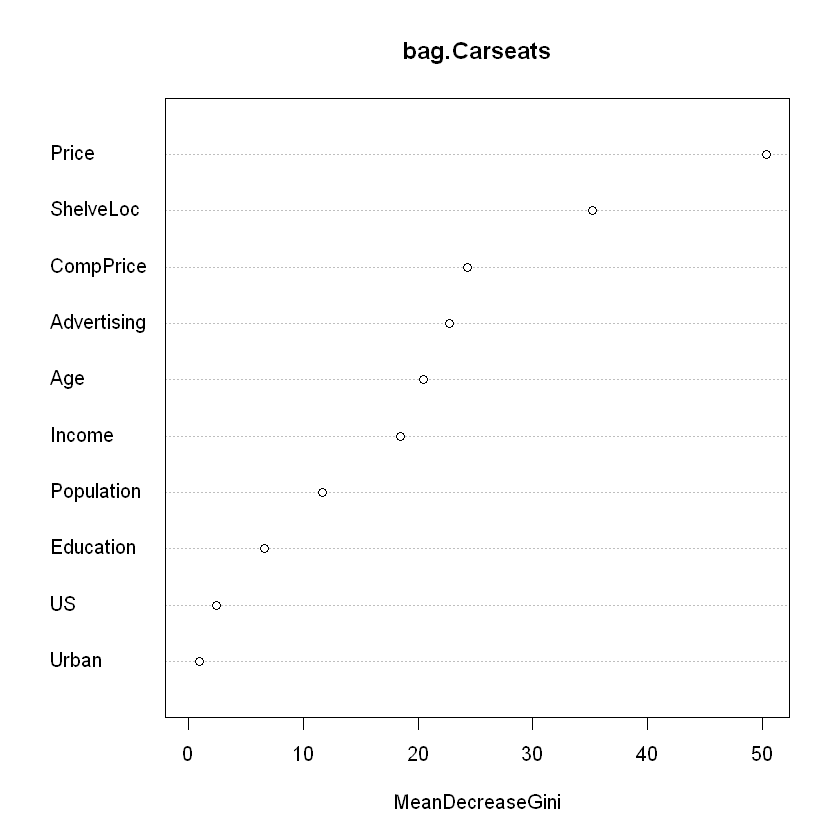

In [14]:
varImpPlot(bag.Carseats)

## <font color='blue'> Practice</font>
### Evaluate the performance of a RF on <font color='red'> Carseats</font> data, that is you can estimate the <font color='red'> test error</font> with different <font color='red'> mtry</font> or <font color='red'> ntree</font>. 

In [15]:
set.seed(20191212)
train = sample (1:nrow(Carseats), 200) #50%訓練集 50%測試集
Carseats.test = Carseats[-train, ]
High.test = High[-train] #response

In [16]:
rf.Carseats = randomForest(High~.-Sales, data = Carseats, mtry=4, ntree=100, subset=train)
rf.pred = predict(rf.Carseats ,Carseats.test ,type="class") #指定type="class"表示會回傳預測的種類
table(rf.pred, High.test)#混淆矩陣
mean(rf.pred==High.test)#測試集準確度

       High.test
rf.pred  No Yes
    No  104  23
    Yes   9  64

[1] 0.84